# 🤖 Fraud Detection - Reinforcement Learning (Q-Learning Style)
This notebook simulates an adaptive agent learning to flag fraudulent transactions using reward signals.

## 🎯 Objective
- Simulate a fraud detection agent
- Use a simplified Q-learning logic
- Learn from transaction features and fraud labels
- Adapt based on reward: +1 for correct fraud detection, -1 for missed or false flag

## 📥 Step 1: Load and Prepare Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load enhanced data
df = pd.read_csv("enhanced_online_fraud_dataset.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,is_receiver_zero_before,is_receiver_exact_amount,is_large_txn,org_to_dest_same,sender_is_customer,receiver_is_customer,receiver_is_merchant,risk_combo,hour,is_night
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,...,1,0,0,0,1,0,1,0,1,1
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,...,1,0,0,0,1,0,1,0,1,1
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,...,1,0,0,0,1,1,0,0,1,1
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,...,0,0,0,0,1,1,0,0,1,1
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,...,1,0,0,0,1,0,1,0,1,1


In [2]:


# Simplify for simulation
features = ['amount', 'balance_diff_org', 'balance_diff_dest', 'txn_ratio', 'is_large_txn', 'is_receiver_zero_before']
df_sim = df[features + ['isFraud']].copy()

# Normalize features
df_sim[features] = (df_sim[features] - df_sim[features].mean()) / df_sim[features].std()

# Convert to numpy
X = df_sim[features].values
y = df_sim['isFraud'].values

## 🧠 Step 2: Q-Learning Simulation

In [3]:
n_features = X.shape[1]
weights = np.random.randn(n_features)
alpha = 0.01  # learning rate
gamma = 0.9   # discount factor
epsilon = 0.1  # exploration rate
rewards = []

# Simulate interaction
for episode in range(1, 11):  # 10 episodes
    total_reward = 0
    for i in range(len(X)):
        state = X[i]
        true_label = y[i]
        
        # Epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = np.random.randint(0, 2)  # Random guess: 0 or 1
        else:
            action = int(np.dot(weights, state) > 0)  # Predict based on weights
        
        # Reward rule
        if action == true_label:
            reward = 1
        else:
            reward = -1
        
        # Update rule (gradient ascent)
        weights += alpha * reward * state
        total_reward += reward
    
    rewards.append(total_reward)
    print(f"Episode {episode}: Total Reward = {total_reward}")

Episode 1: Total Reward = 3372
Episode 2: Total Reward = 31274
Episode 3: Total Reward = -7928
Episode 4: Total Reward = -1440
Episode 5: Total Reward = -26382
Episode 6: Total Reward = 26098
Episode 7: Total Reward = -30574
Episode 8: Total Reward = 2892
Episode 9: Total Reward = 10856
Episode 10: Total Reward = 6356


## 📈 Step 3: Plot Learning Curve

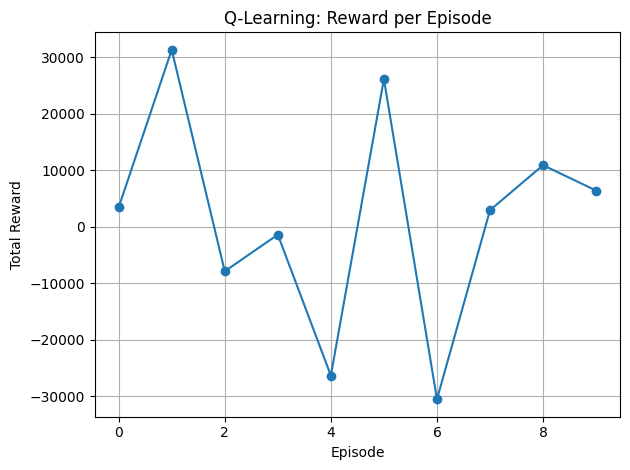

In [4]:
import matplotlib.pyplot as plt

plt.plot(rewards, marker='o')
plt.title("Q-Learning: Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
# Save learned weights as .npy file
np.save("qlearning_fraud_weights.npy", weights)
print("✅ Q-Learning weights saved to 'qlearning_fraud_weights.npy'")


✅ Q-Learning weights saved to 'qlearning_fraud_weights.npy'


In [6]:
# Load weights
weights = np.load("qlearning_fraud_weights.npy")
print("✅ Weights loaded successfully")


✅ Weights loaded successfully


In [ ]:
import joblib
joblib.dump(scaler, "qlearning_scaler.pkl")
# Later use: scaler = joblib.load("qlearning_scaler.pkl")
print("✅ Scaler saved as 'qlearning_scaler.pkl'")

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

# Predict with Q-Learning agent (dot product → decision boundary)
def predict_fraud_qlearning(x_row):
    score = np.dot(weights, x_row)
    return int(score > 0)  # 1 = fraud, 0 = legit

# Test on first 5 transactions
for i in range(20):
    row = X_scaled[i]
    label = predict_fraud_qlearning(row)
    print(f"Sample {i+1}: Predicted = {'FRAUD' if label == 1 else 'LEGIT'}")


Sample 1: Predicted = LEGIT
Sample 2: Predicted = LEGIT
Sample 3: Predicted = LEGIT
Sample 4: Predicted = FRAUD
Sample 5: Predicted = LEGIT
Sample 6: Predicted = LEGIT
Sample 7: Predicted = LEGIT
Sample 8: Predicted = LEGIT
Sample 9: Predicted = LEGIT
Sample 10: Predicted = LEGIT
Sample 11: Predicted = FRAUD
Sample 12: Predicted = LEGIT
Sample 13: Predicted = LEGIT
Sample 14: Predicted = LEGIT
Sample 15: Predicted = LEGIT
Sample 16: Predicted = LEGIT
Sample 17: Predicted = LEGIT
Sample 18: Predicted = LEGIT
Sample 19: Predicted = LEGIT
Sample 20: Predicted = LEGIT


In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def predict_fraud_qlearning_with_confidence(x_row):
    score = np.dot(weights, x_row)
    confidence = sigmoid(score)  # ranges from 0 to 1
    prediction = int(confidence > 0.5)
    return prediction, confidence


In [9]:
# Load scaler and weights
#scaler = joblib.load("qlearning_scaler.pkl")
weights = np.load("qlearning_fraud_weights.npy")

# Prepare data
#features = ['amount', 'balance_diff_org', 'balance_diff_dest', 'txn_ratio', 'is_large_txn', 'is_receiver_zero_before']
#df = pd.read_csv("enhanced_fraud_dataset.csv")
X = df[features]
y_true = df['isFraud']
X_scaled = scaler.transform(X)

# Predict and compare with actual
results = []

for i in range(20):  # Check top 10 samples
    row = X_scaled[i]
    pred, conf = predict_fraud_qlearning_with_confidence(row)
    results.append({
        'Sample': i + 1,
        'True Label': 'FRAUD' if y_true.iloc[i] == 1 else 'LEGIT',
        'Predicted': 'FRAUD' if pred == 1 else 'LEGIT',
        'Confidence': f"{conf * 100:.2f}%"
    })

# Display results
pd.DataFrame(results)


,Sample,True Label,Predicted,Confidence
0,1,LEGIT,LEGIT,1.46%
1,2,LEGIT,LEGIT,10.88%
2,3,FRAUD,LEGIT,16.01%
3,4,FRAUD,FRAUD,58.46%
4,5,LEGIT,LEGIT,0.90%
5,6,LEGIT,LEGIT,2.46%
6,7,LEGIT,LEGIT,2.96%
7,8,LEGIT,LEGIT,2.43%
8,9,LEGIT,LEGIT,8.68%
9,10,LEGIT,LEGIT,31.02%
